![hkkjkjkjnkjnkjnk](https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Titanic-Cobh-Harbour-1912.JPG/1600px-Titanic-Cobh-Harbour-1912.JPG)








**TITANIC**

In this notebook, we build various feature selection technique like Variance Threshold, SelectKBest, SequentialFeatureSelector,RFE,Regularization,Random Forest Importance which help to choose which indepedent variable best for prediction on titanic dataset.Then we build logistic regression, decision tree, and polynomial features to predict survival on the titanic. 

INTRODUCTION 

1. Checking missing data
2. Data Cleaning
3. Drop unnecessary columns
4. Variance Threshold
5. Select K Best
6. Select From Model for Logistic Regression
7. Sequential feature Selection for Logistic Regression
8. Recursive Feature Selection
9. Embeeded Method
10.Logistic Regression
11. Polynomial Feature
12.Decision Tree

In [28]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd

In [29]:
# read train datasets
train = pd.read_csv('train.csv')

In [30]:
#check the train dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

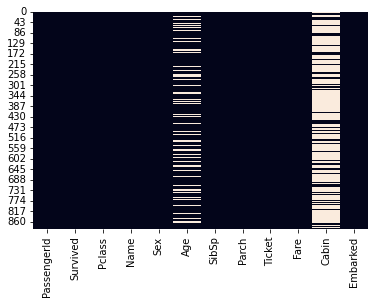

In [31]:
#now, we are checking start with a pairplot, and check for missing values
sns.heatmap(train.isnull(),cbar=False)

As we see above, Age  and Cabin column have lots of missing values. But, age column is important data for explorary data analysis. Thus, we get the median of data. 

In [32]:
#Data Cleaning and Data Drop Process
train['Fare'] = train['Fare'].fillna(train['Fare'].dropna().median())
train['Age'] = train['Age'].fillna(train['Age'].dropna().median())
# Change to categoric column to numeric
train.loc[train['Sex']=='male','Sex']=0
train.loc[train['Sex']=='female','Sex']=1
# instead of nan values
train['Embarked']=train['Embarked'].fillna('S') 
# Change to categoric column to numeric
train.loc[train['Embarked']=='S','Embarked']=0
train.loc[train['Embarked']=='C','Embarked']=1
train.loc[train['Embarked']=='Q','Embarked']=2

In [33]:
#Drop unnecessary columns
drop_elements = ['Name','Cabin','Ticket']
train = train.drop(drop_elements, axis=1)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [35]:
# which columns we have
train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

how to retrieve the 5 right informative features in the Titanic #1 dataset.

**Variance Threshold**

This feature selection algorithm looks only at the features (X). We set threshold 0.5 which lower than this threshold will be removed. 
       Feature with a higher variance means that the value within that feature varies or has a high cardinality. On the other hand, lower variance means the value within the feature is similar, and zero variance means you have a feature with the same value.

In [36]:
from sklearn.feature_selection import VarianceThreshold

mdlsel = VarianceThreshold(threshold=0.5)
mdlsel.fit(train)
ix = mdlsel.get_support()
#data1 = mdlsel.transform(train) 
data1 = pd.DataFrame(mdlsel.transform(train), columns = train.columns.values[ix])
data1.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.25
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.925
3,4,1,35.0,1,0,53.1
4,5,3,35.0,0,0,8.05


**Select K Best**

Select features according to the k highest scores.
- f_classif compute the ANOVA F-value for the provided sample.
- chi2 compute chi-squared stats between each non-negative feature and class.
- mutual_info_classif estimate mutual information for a discrete target variable.

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2

X = train.drop("Survived",axis=1)
y = train["Survived"]

mdlsel1 = SelectKBest(f_classif, k=5) 
mdlsel1.fit(X,y)
ix1 = mdlsel1.get_support()

data2 = pd.DataFrame(mdlsel1.transform(X), columns = X.columns.values[ix1]) 
print(data2.head(n=5))

mdlsel2 = SelectKBest(mutual_info_classif, k=5) 
mdlsel2.fit(X,y)
ix2 = mdlsel2.get_support() 
data2A = pd.DataFrame(mdlsel2.transform(X), columns = X.columns.values[ix2]) 
print(data2A.head(n=5))

  Pclass Sex Parch     Fare Embarked
0      3   0     0     7.25        0
1      1   1     0  71.2833        1
2      3   1     0    7.925        0
3      1   1     0     53.1        0
4      3   0     0     8.05        0
  Pclass Sex SibSp Parch     Fare
0      3   0     1     0     7.25
1      1   1     1     0  71.2833
2      3   1     0     0    7.925
3      1   1     1     0     53.1
4      3   0     0     0     8.05


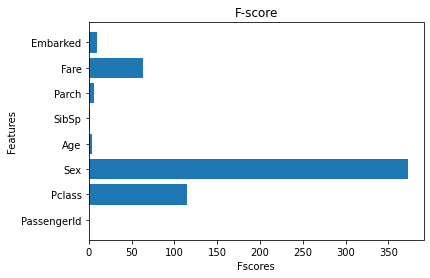

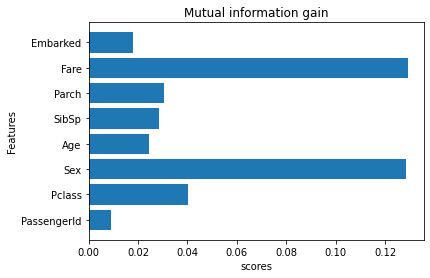

In [38]:
import matplotlib.pyplot as plt
#plotting of F-score values and the corresponding features
features_k_best = X.columns
features_k_best_Scores = mdlsel1.scores_
plt.barh(features_k_best,features_k_best_Scores)
plt.title('F-score')
plt.ylabel('Features')
plt.xlabel('Fscores')
plt.show()

#plotting of mutual information gain values and the corresponding features
features_k_best = X.columns
features_k_best_Scores = mdlsel2.scores_
plt.barh(features_k_best,features_k_best_Scores)
plt.title('Mutual information gain')
plt.ylabel('Features')
plt.xlabel('scores')
plt.show()

**Sequential feature Selection for Logistic Regression**


In [39]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs_selector = SequentialFeatureSelector(estimator=LogisticRegression(max_iter = 400), n_features_to_select = 5,
                                         scoring = 'accuracy', direction ='backward')
sfs_selector.fit(X, y)
X.columns[sfs_selector.get_support()]


Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [40]:
#used mlxtend library for the sequential feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
sfs1 = SFS(knn, 
           k_features=5, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s finished

[2022-03-24 15:06:52] Features: 7/5 -- score: 0.8024691358024691[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s finished

[2022-03-24 15:06:52] Features: 6/5 -- score: 0.8507295173961841[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished

[2022-03-24 15:06:52] Features: 5/5 -- score: 0.8507295173961841

In [41]:
#subsets feature selected and their corresponsing cv_scores and avg_scores
sfs1.subsets_

{8: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7),
  'cv_scores': array([0.74971942]),
  'avg_score': 0.7497194163860831,
  'feature_names': ('PassengerId',
   'Pclass',
   'Sex',
   'Age',
   'SibSp',
   'Parch',
   'Fare',
   'Embarked')},
 7: {'feature_idx': (1, 2, 3, 4, 5, 6, 7),
  'cv_scores': array([0.80246914]),
  'avg_score': 0.8024691358024691,
  'feature_names': ('Pclass',
   'Sex',
   'Age',
   'SibSp',
   'Parch',
   'Fare',
   'Embarked')},
 6: {'feature_idx': (1, 2, 3, 4, 5, 7),
  'cv_scores': array([0.85072952]),
  'avg_score': 0.8507295173961841,
  'feature_names': ('Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked')},
 5: {'feature_idx': (1, 2, 3, 4, 7),
  'cv_scores': array([0.85072952]),
  'avg_score': 0.8507295173961841,
  'feature_names': ('Pclass', 'Sex', 'Age', 'SibSp', 'Embarked')}}

In [42]:
#extract the required best features
sfs1.k_feature_names_

('Pclass', 'Sex', 'Age', 'SibSp', 'Embarked')

C:\Users\user\.julia\conda\3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\user\.julia\conda\3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


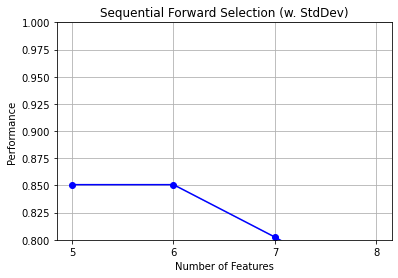

In [43]:
#plotting of numberoffeatures to select and their corresponding performance scores
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()
#warning due to version conflict

**Recursive Feature Selection**

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. 

Source: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html 

In [44]:
#last feature selection
from sklearn.feature_selection import RFE

mdl = RFE(linmdl,n_features_to_select=5)
mdl.fit(X,y)
ix = mdl.get_support() 

data4 = pd.DataFrame(mdl.transform(X), columns = X.columns.values[ix]) 
data4.head(n=5)


C:\Users\user\.julia\conda\3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\.julia\conda\3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

,Pclass,Sex,SibSp,Parch,Embarked
0,3,0,1,0,0
1,1,1,1,0,1
2,3,1,0,0,0
3,1,1,1,0,0
4,3,0,0,0,0


**Embeeded Method**
 

**Feature Selection by Mean Decrease Impurity**
1. The Random Forests is  the tree-based strategies which naturally ranks by how well they improve the purity of the node.
2. For classification, gini impurity or information gain whereas for regresssion it is variance.
3. When training a tree, it can be computed how much each feature decreases the weighted impurity in a tree.
4. For a forest, the impurity decrease from each feature can be averaged and the features are ranked according to this measure.



In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=101)
rfc.fit(X, y)

feature_importances = [(feature, score) for feature, score in zip(cols, rfc.feature_importances_)]
print(feature_importances)
MDI = X.columns[rfc.feature_importances_ > 0.01]

print('Total features slected by Random Forest:',len(MDI))
g = pd.DataFrame(sorted(feature_importances, key=lambda x: -x[1])[:len(MDI)], columns=['Feature','Importance']).\
plot(x='Feature', kind='barh', figsize=(20,7), fontsize=18, grid=True)
plt.show()

NameError: name 'cols' is not defined

**Feature Selection By Regularization**
using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net). 

In [46]:
from sklearn.linear_model import SGDClassifier
from rfpimp import * 

svm = SGDClassifier(penalty='elasticnet', class_weight='balanced', n_jobs = - 1, random_state=101)
svm.fit(X, y)

imp = importances(svm, X, y, n_samples=-1) # permutation
RM = imp[imp!=0].dropna().index
    
print(RM)
print(imp)
        
print('%d features are selected.' % len(RM))
#plot_importances(imp[imp!=0].dropna(), figsize=(20,7))

Index(['Fare', 'SibSp', 'Sex', 'Age', 'Pclass', 'Parch', 'Embarked',
       'PassengerId'],
      dtype='object', name='Feature')
             Importance
Feature                
Fare           0.118967
SibSp          0.020202
Sex            0.007856
Age            0.004489
Pclass         0.001122
Parch          0.001122
Embarked      -0.007856
PassengerId   -0.010101
8 features are selected.


***Logistic Regresssion***

In [47]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Linear Model
linmdl = LogisticRegression()

#input and output
target = train['Survived']
features = train[['Pclass','Sex','SibSp','Parch','Age']]

#Build test and training test
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)


classifier = linear_model.LogisticRegression()
classifier_ = classifier.fit(X_train,y_train)
target_predict=classifier_.predict(X_test)


print("Logistic Regression Score: ",accuracy_score(y_test,target_predict))

from sklearn.metrics import mean_squared_error, r2_score
print ("MSE    :",mean_squared_error(y_test,target_predict))
print ("R2     :",r2_score(y_test,target_predict))

Logistic Regression Score:  0.8246268656716418
MSE    : 0.17537313432835822
R2     : 0.27721351925173576


***Polynomial Features***

In [48]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#Build test and training test
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)
poly = preprocessing.PolynomialFeatures(degree=2,include_bias=False)
poly_features = poly.fit_transform(features)

classifier_ = classifier.fit(X_train,y_train)
print("Polynomial Features: ",accuracy_score(y_test,target_predict))

from sklearn.metrics import mean_squared_error, r2_score
print ("MSE    :",mean_squared_error(y_test,target_predict))
print ("R2     :",r2_score(y_test,target_predict))

Polynomial Features:  0.8246268656716418
MSE    : 0.17537313432835822
R2     : 0.27721351925173576


***Decision Tree***

In [49]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

target = train['Survived'].values
data_features_names = ['Pclass','Sex','SibSp','Parch','Fare','Embarked','Age']
features = train[data_features_names].values

#Build test and training test
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)

decision_tree = tree.DecisionTreeClassifier(random_state=1,criterion = 'entropy',min_samples_split = 100)


decision_tree_ = decision_tree.fit(X_train,y_train)
target_predict=decision_tree_.predict(X_test)

print("Decision tree score: ",accuracy_score(y_test,target_predict))

from sklearn.metrics import mean_squared_error, r2_score
print ("MSE    :",mean_squared_error(y_test,target_predict))
print ("R2     :",r2_score(y_test,target_predict))

Decision tree score:  0.8134328358208955
MSE    : 0.1865671641791045
R2     : 0.23107821196993172
